<a href="https://colab.research.google.com/github/DontPanic96/site_dontpanic96/blob/main/Portfolio_ML_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: построение модели для оценки кредитной дисциплины клиента в банковском секторе

Цель проекта: на основе исторических количественных и качественных данных о клиентах в банковском секторе, а также присвоенном каждому клиенту категориального признаке скоринга (оценка `Дисциплина клиента без просрочки по кредиту`), разработать классификационную модель для прогнорзирования скоринга  для новых клиентов.


# Задачи проекта



*   Подготовить данные для построения классификационной модели
* Провести корреляционный анализ зависимостей между признаками и целевой переменной
*   Построенеи нескольких MK моделей и выбор оптимального варианта в соответствиис параметрами качества
*   Формирование прогноза
*   Анализ результатов, подготовка отчета по итогам

В данном примере целевая переменная это -- "Дисциплина клиентов без просрочки по кредиту". Построим для прогнозирования ее значений классификационную модель

Этапы реализации:
1. Загрузка данных
2. Предобработка данных (здесь не выполнена)
3. Отбор признаков для построения модели
4. Формирование обучающего и тестового множества (валидационное)
5. Стандартизация/нормализация данных
6. Построение модели на обучающем множестве
7. Оценка качества модели на тестовом (валидационном) множестве
8. Построение прогноза (при условии соответствиии модели заданным параметрам качества)
9. Написание выводов, разработка визуализаций и рекомендаций.

# Описание данных
Проект использует датасет (ds), содержащий данные о банковских транзакциях и описательных данных клиентов.

Переменные ds (поля таблицы):

`Идентификатор` уникальный ID клиента

`Дата рождения`

`Дисциплина клиентов без просрочки по кредиту` целевая пременная, характерезующая клиента банка. Значения: BAD
`Количество переводов` количество банковских транзакций, соверщшенных в период

`Тип переводов`

`География переводов`

`География телефона`

`Сумма перевода`

`Максимальная сумма перевода`

`Средняя сумма перевода`

`Полная сумма перевода` идентичен параметру `Сумма переводов`

`Канал, через который пришел клиент`

`Оператор связи`

`Пол`



Так как целевая переменная является мультиклассовая, то для классификации используем метод Rrandom Forest

1. Загрузка, предобработка данных

In [ ]:
import pandas as pd
import numpy as np

#кодирование
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# классификационные модели
# логистическая регрессия
from sklearn.linear_model import LogisticRegression

# дерево решений
from sklearn.tree import DecisionTreeClassifier

# метод опорных векторов
from sklearn.svm import SVC

# случайный лес
from sklearn.ensemble import RandomForestClassifier

# градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier

# наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB

# k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# метод SGD (стохастический градиентный спуск) для больших данных
from sklearn.linear_model import SGDClassifier

# https://scikit-learn.org/0.15/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



#Поиск оптимальных параметров  модели по сетке
from sklearn.model_selection import GridSearchCV

# Визуализации
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ds_banki.csv')
df.head(2)
df.describe()

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.0,265000.0,21858.8235,371600.0,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.0,135000.0,34393.5000,137574.0,Стойка,NaN,М


In [ ]:
# Удалим дублирующие столбцы
df.drop(columns=['Сумма перевода', 'Средняя сумма перевода'],
        inplace=True)

In [ ]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()
df.shape[0]

47644

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Максимальная сумма перевода                   50158 non-null  float64
 8   Полная сумма перевода                         50158 non-null  float64
 9   Канал, через который пришел клиент            50193 non-null 

In [ ]:
# Преобразоывание типов данных
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'])

Отбор и кодирование вещественных признаков для построения модели

In [ ]:
lst_col_to_label_encoder = ['Дисциплина клиентов без просрочки по кредиту',
                            'Канал, через который пришел клиент',
                            'Оператор связи', 'Пол']
l_e =  LabelEncoder()
for col in lst_col_to_label_encoder:
    df[col.split()[0].split(',')[0]+'_enc'] = l_e.fit_transform(df[col])

df.head(30)


lst_col_class = ['Количество переводов',
                'Тип переводов', # исключение признака для оптимизации модели
                'География переводов',
                'География телефона',
                 'Максимальная сумма перевода',
                 'Полная сумма перевода',
                 'Дисциплина_enc',
                 'Канал_enc',
                'Оператор_enc',
                'Пол_enc'
                 ]


Анализ корреляционных зависимостей между признаками и целевой переменной

In [ ]:
correlation_matrix = df[lst_col_class].corr(method='pearson')

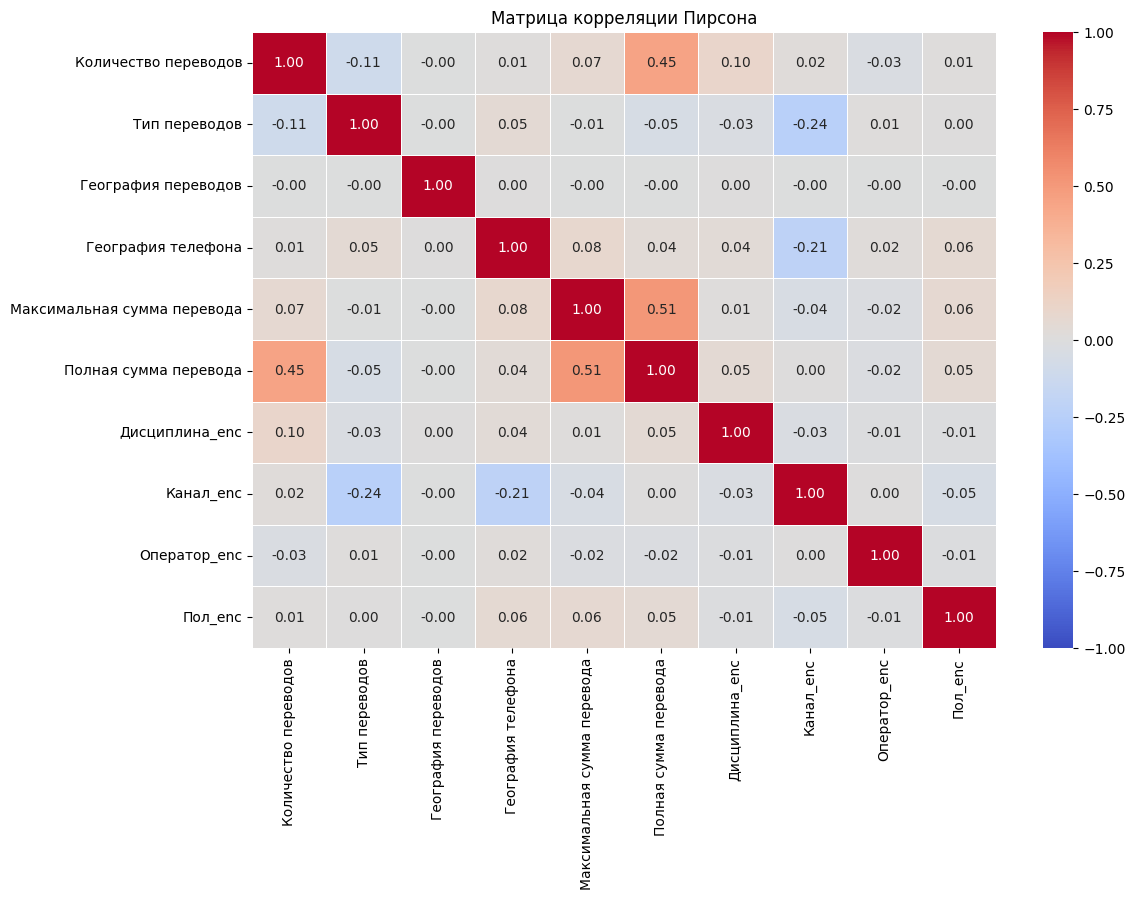

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            linewidths=0.5)
plt.title("Матрица корреляции Пирсона")
plt.show()

Вывод: наблюдаем значимые пропорциональные связи переменных:

1.   Количество переводов - Полная сумма переводов
2.   Максимальная сумма переводов - Полная сумма переводов


Низкозначимые обратно-пропорциональные  связи переменных:

1.   Канал - тип переводов
2.   Канал - георгафия прерводов


In [ ]:
# Определление переменных со значимым уровнем корреляции
# strong_corr = correlation_matrix[abs(correlation_matrix) > 0.5]

Формирование обучающего и тестового множества (валидационное)

In [ ]:
X = df[lst_col_class].drop(columns='Дисциплина_enc')
y = df['Дисциплина_enc']


# Разделение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=0)

In [ ]:
# Проверка размерности выборок train, test
x_train.shape[0]/X.shape[0]

0.6999832087985896

Стандартизация/нормализация данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)

x_test_norm = scaler.transform(x_test)

<Axes: xlabel='Дисциплина_enc', ylabel='count'>

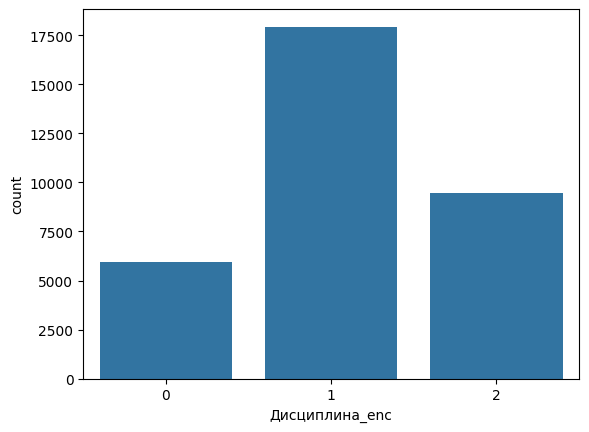

In [ ]:
# Проверимся, как распредделились объекты класса целевой переменной
import seaborn as sns
sns.countplot(x=y_train)

Видим неравномерное распределение с перевесом для объекта с индексом 1 (BAD)

Построение моделей на обучающем множестве

Классификатор LogisticRegression

In [ ]:
# Классификатор LogisticRegression:
#параметр class_weight='balanced' в дальнейшем исключен  для баланса объектов
lr = LogisticRegression(random_state=42)#, class_weight='balanced')


lr.fit(x_train_norm, y_train)

LogisticRegression(random_state=42)

Оценка качества модели лог.регрессиии

In [ ]:
print('Result:')
print('Accuracy of Logistic Regression classifier on training subset: {:.2f}'
     .format(lr.score(x_train_norm, y_train)))
print('Accuracy of Logistic Regression classifier on test subset: {:.2f}'
     .format(lr.score(x_test_norm, y_test)))
print('')
print('---'*10)

# просмотр  параметров логрегрессиии (классификатор)
print('Coefficients: \n', lr.coef_)
print('')
print('---'*10)
print('Intercept: \n', lr.intercept_)
print('')

Result:
Accuracy of Logistic Regression classifier on training subset: 0.54
Accuracy of Logistic Regression classifier on test subset: 0.53

------------------------------
Coefficients: 
 [[-7.15282642  0.04551281  0.21697943 -0.25540887 -0.16263954 -5.27199766
   0.34866809  0.14220811  0.08305489]
 [ 1.27652322  0.18438163 -0.26399003  0.1746885   0.65422066  3.24484859
  -0.27737396 -0.08095688 -0.06919446]
 [ 5.8763032  -0.22989444  0.0470106   0.08072037 -0.49158112  2.02714907
  -0.07129413 -0.06125123 -0.01386042]]

------------------------------
Intercept: 
 [-0.41102459  0.4678098  -0.05678521]



Построение прогностической модеди на обучаюшем множестве

In [ ]:
y_pred = lr.predict(x_test_norm)

Анализ параметров качества построенной модели

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2687
           1       0.53      1.00      0.69      7589
           2       0.25      0.00      0.00      4018

    accuracy                           0.53     14294
   macro avg       0.26      0.33      0.23     14294
weighted avg       0.35      0.53      0.37     14294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Вывод:

1. Результативность прогностической модели неудовлетворительная, поскольку полностью не распознает объекты BAD [0] MIDDLE  [2] класса "Дисциплина_enc"

2. Вероятность качества прогнозирования для  объектов GOOD = 0.53, что немногим выше случайного распределения.

3. Рекомендовано:

 -- Изменить набор параметров модели

 -- Провести ETL анализ первичных данных

Определение оптимальных гиперпараметров для логистической регрессии

In [ ]:
grid_search = GridSearchCV(
    LogisticRegression(max_iter=3000, random_state=42, solver='liblinear'),
    param_grid={
        'C': [0.01, 0.1, 0.5, 1, 10, 50, 100],
        'penalty': ['l1', 'l2']
    }
    , cv=5,
    scoring = 'accuracy')

grid_search.fit(x_train_norm, y_train)
print('best params -- {}'.format(grid_search.best_params_))
print('best pscore -- {}'.format(grid_search.best_score_))
print(grid_search.score(x_test_norm, y_test))

best params -- {'C': 50, 'penalty': 'l1'}
best pscore -- 0.5387406296851575
0.5308521057786484


Построение модели на основе подбора гиперпараметров

In [ ]:
lr = LogisticRegression(random_state=42, C=50, penalty='l1', solver='liblinear')
lr.fit(x_train_norm, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

Построение прогностической модели по оптимизированным гиперпараметрам

In [ ]:
y_pred = lr.predict(x_test_norm)

# Просмотр параметров качества построенной модели
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2687
           1       0.53      1.00      0.69      7589
           2       0.48      0.01      0.01      4018

    accuracy                           0.53     14294
   macro avg       0.34      0.33      0.24     14294
weighted avg       0.42      0.53      0.37     14294



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Вывод:**

качество модели на основе подборанных гипермараметров значимо не улучшилось и вероятностная предсказательность остается на уровне случайности для признака с индексами [1] и [2].

Модель не научилась определять объекты [0].

# Итоговая оценка модели
Модель демонстрирует плохое качество (тестовая accuracy 53.1% ≈ случайное угадывание) и не может быть применена для скоринга клиентов по критерию "Дисциплина"

Необходимо:

Проверить данные на дисбаланс и зашумленность.

Использовать более информативные метрики (F1, ROC-AUC).

Рассмотреть другие модели или признаки.

Оценка пермутационной важности признаков

метод permutation_importance оценивает, насколько уменьшается точность модели (accuracy), если значения признака случайно перемешаны.

Чем сильнее падает accuracy — тем важнее признак.

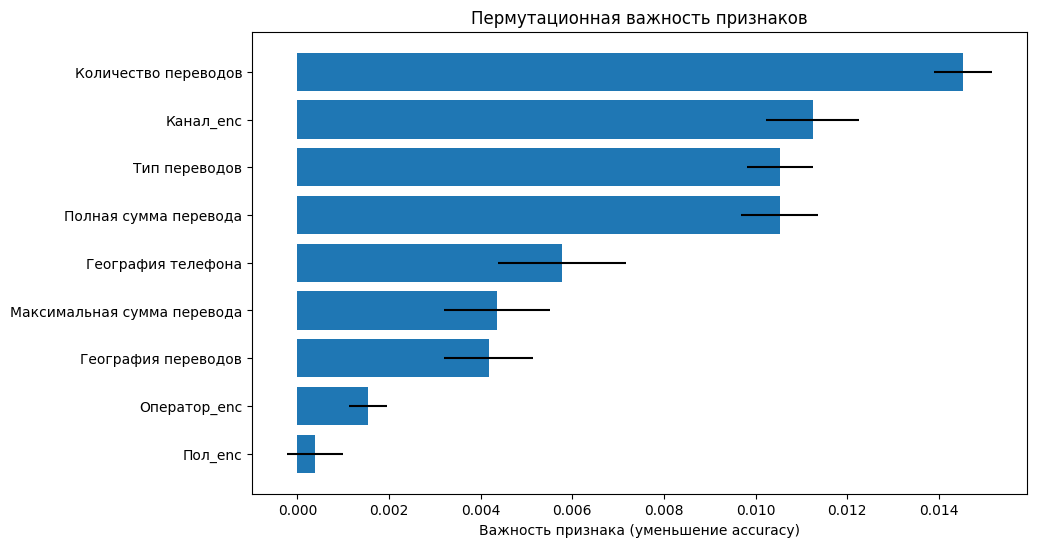

In [ ]:
# Оценим важность признаков

from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

result = permutation_importance(
    grid_search.best_estimator_,
    x_test_norm,
    y_test,
    n_repeats=10,
    random_state=42
)

# Создаем DataFrame с результатами
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
})


importance_df = importance_df.sort_values('importance_mean', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance_mean'], xerr=importance_df['importance_std'])
plt.xlabel('Важность признака (уменьшение accuracy)')
plt.title('Пермутационная важность признаков')
plt.gca().invert_yaxis()  # Самые важные признаки сверху
plt.show()

Интерпретация графика:

Переменные - Количество переводов, Канал_enc, Тип перреводов, Полная сумма переводов -  — критически важны для модели.

Ширина ошибок (importance_std): если большая — оценка неустойчива (нужно увеличить n_repeats).

Построение модели на основе классификатора RandomForestClassifier

In [ ]:
# Построение модели и подбор оптимальных гиперпараметров

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
        'n_estimators': [1, 50, 100, 150, 200],
        'max_depth': [4, 5, 6, 7, 10, 12]
    }
    , cv=5,
    scoring = 'accuracy')

grid_search.fit(x_train_norm, y_train)
print('best params -- {}'.format(grid_search.best_params_))
print('best pscore -- {}'.format(grid_search.best_score_))
print(grid_search.score(x_test_norm, y_test))

best params -- {'max_depth': 10, 'n_estimators': 150}
best pscore -- 0.5540929535232384
0.5506506226388694


Оптимизация модели по гиперпараметрам

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report


rnd_clf =  RandomForestClassifier(n_estimators = 150,
                               max_depth = 10,
                               random_state = 42)
rnd_clf.fit(x_train_norm, y_train)
y_pred = rnd_clf.predict(x_test_norm)

print('Metrics of quality for RandomForestRegressor', '\n', classification_report(y_test, y_pred))


Метрика качества для RandomForestRegressor 
               precision    recall  f1-score   support

           0       0.51      0.17      0.25      2687
           1       0.55      0.96      0.70      7589
           2       0.57      0.04      0.07      4018

    accuracy                           0.55     14294
   macro avg       0.54      0.39      0.34     14294
weighted avg       0.55      0.55      0.44     14294



              precision    recall  f1-score   support

           0       0.51      0.17      0.25      2687
           1       0.55      0.96      0.70      7589
           2       0.57      0.04      0.07      4018

    accuracy                           0.55     14294
   macro avg       0.54      0.39      0.34     14294
weighted avg       0.55      0.55      0.44     14294



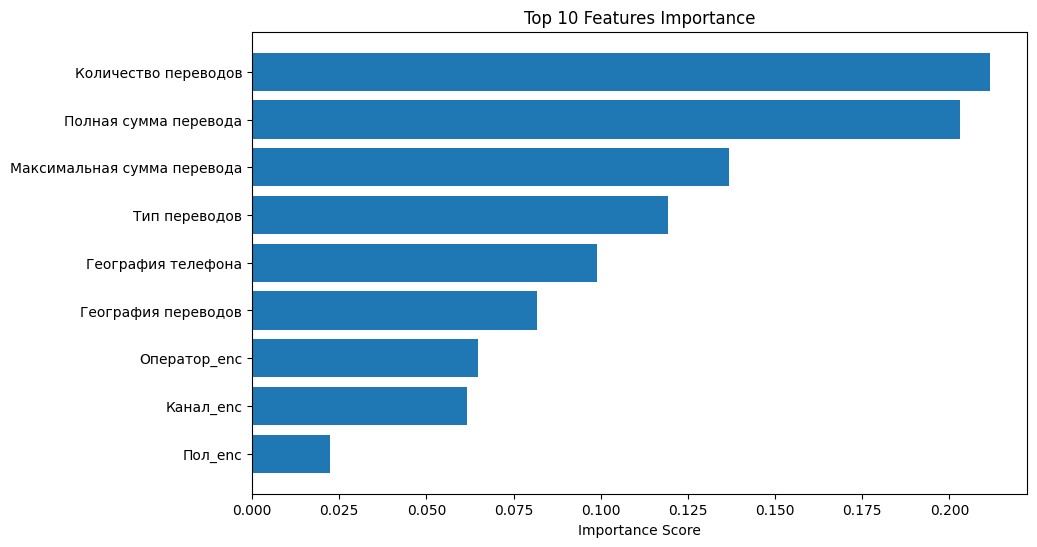

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# import pandas as pd

feature_names = ['Количество переводов', 'Тип переводов', 'География переводов',
                 'География телефона', 'Максимальная сумма перевода',
                 'Полная сумма перевода', 'Канал_enc',
                 'Оператор_enc', 'Пол_enc']  # Ваш список названий

rnd_clf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
rnd_clf.fit(x_train_norm, y_train)

# Оценка важности признаков
rnd_imp_var = pd.DataFrame({
    'feature': feature_names,  # Используем названия
    'importance': rnd_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Предсказание и отчёт
y_pred = rnd_clf.predict(x_test_norm)
print(classification_report(y_test, y_pred))

# Визуализация важности признаков
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(rnd_imp_var['feature'][:10], rnd_imp_var['importance'][:10])
plt.title('Top 10 Features Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

Вывод:
-
метод классификации RandomForest демонстрирует показатели лучше регрессионой классификации

- пороговые значения предсказания метрик выше среднестатистического для всех трех объектов класса

- но продолжают оставаться статистически мало значимыми

- модель не может быть применена для бизнес целей

Прогноз для новых данных

In [ ]:
rnd_clf.predict(x_test_norm[:2])

array([1, 1])

In [ ]:
# Оценка вероятности прогноза
rnd_clf.predict_proba(x_test_norm[:2])

array([[0.22938568, 0.47259143, 0.29802289],
       [0.30370096, 0.46631241, 0.22998663]])

# Решение задачи регрессионого анализа

# Проект RF моделирования:

 на основе датасета, содержащий данные о транзакциях с размерами медицинских выплат и описательными характеристиками людей, их получившими.

# Задачи проекта

* Проведение EDA
* Корреляйионный анализ зависимостей между признаками и целевой переменной
* Построенеи нескольких MK моделей и выбор оптимального варианта в соответствиис параметрами качества
* Формирование прогноза
* Анализ результатов, подготовка отчета по итогам

# Описание данных

Данные датасета
https://www.kaggle.com/datasets/awaiskaggler/insurance-csv?resource=download


`age` - возраст

`bmi` - значение артериального давления

`children` - количество детей

`expenses` размер($) медицинской страховой выплаты

`sex` - пол (бинарный признак)

`smoker` - курение (бинарный признак)

`region` - регион прживания


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Регрессоры
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# Метрики
from sklearn.metrics import classification_report

In [3]:
!pip install kagglehub
import kagglehub
# print(kagglehub.__version__)  # Проверка версии

In [4]:
# Получаем датасет
path = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance-csv


In [5]:
df = pd.read_csv('/kaggle/input/insurance-csv/insurance.csv')

In [ ]:
# df = pd.read_csv('/content/ds_insurance.csv')

In [38]:
# print(f'Прпопуски: {df.isnull().sum()} значния {df.isna().sum()}')
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_male          1338 non-null   int64  
 5   smoker_yes        1338 non-null   int64  
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB
None


,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1
1337,61,29.1,0,29141.36,0,1,1,0,0


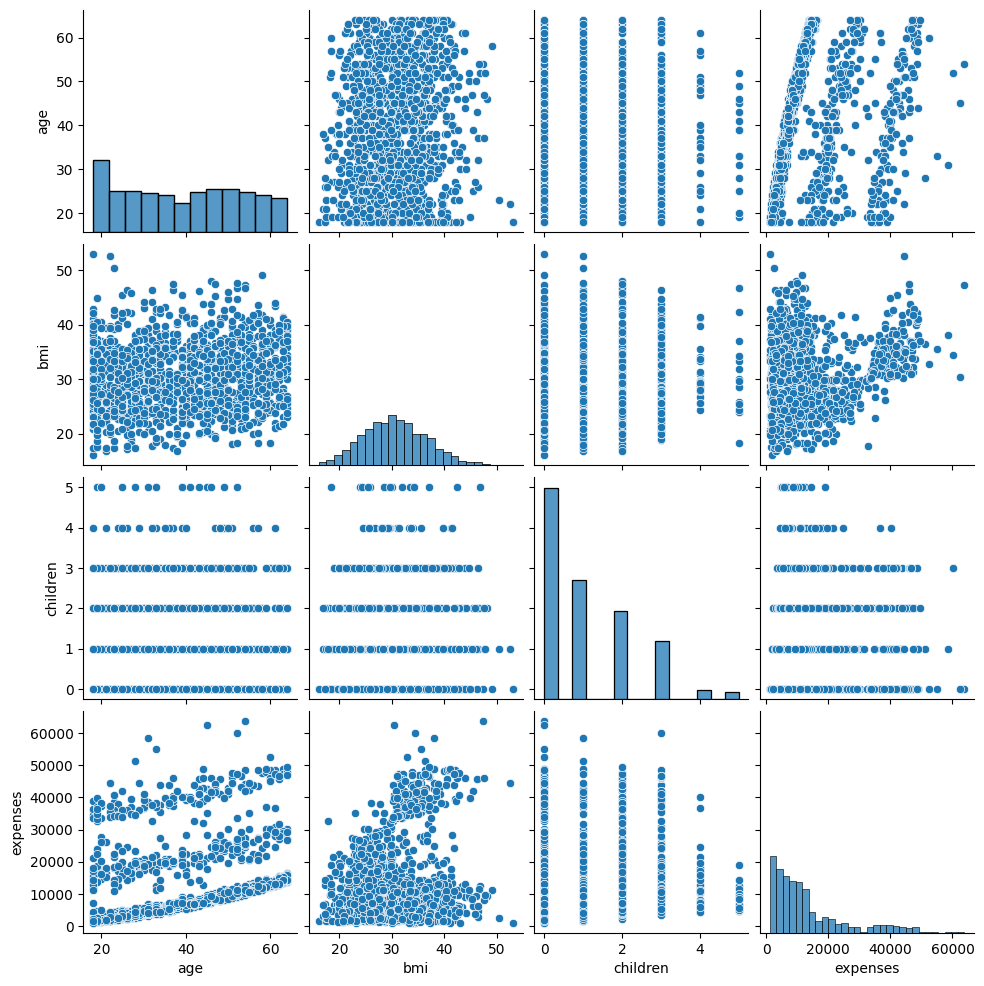

In [ ]:
# Визуализируем данные для оценки распределлений
sns.pairplot(df)
plt.show()

Визуализируем распределение по параметру "expensess" и оценим статистики, выбросы

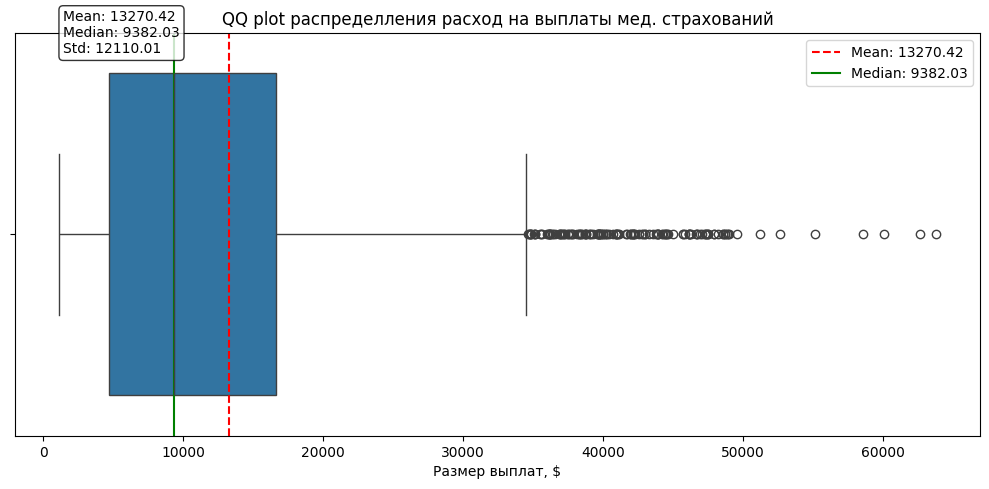

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем статистики
stats = df['expenses'].agg(['mean', 'median', 'std'])


plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=df['expenses'])  # с выбросами
# ax = sns.boxplot(x=df['expenses'], showfliers=False)  # без выбросов

ax.set_title('QQ plot распределления расход на выплаты мед. страхований')
ax.set_xlabel('Размер выплат, $')

# Добавляем линии среднего и медианы
ax.axvline(stats['mean'], color='r', linestyle='--', label=f'Mean: {stats["mean"]:.2f}')
ax.axvline(stats['median'], color='g', linestyle='-', label=f'Median: {stats["median"]:.2f}')

# Добавляем аннотацию со статистикой
stats_text = f"Mean: {stats['mean']:.2f}\nMedian: {stats['median']:.2f}\nStd: {stats['std']:.2f}"
ax.annotate(stats_text,
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Добавляем легенду для линий
ax.legend()

plt.tight_layout()
plt.show()

In [6]:
# Преобразуем категориальные данные dummy кодирование
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)


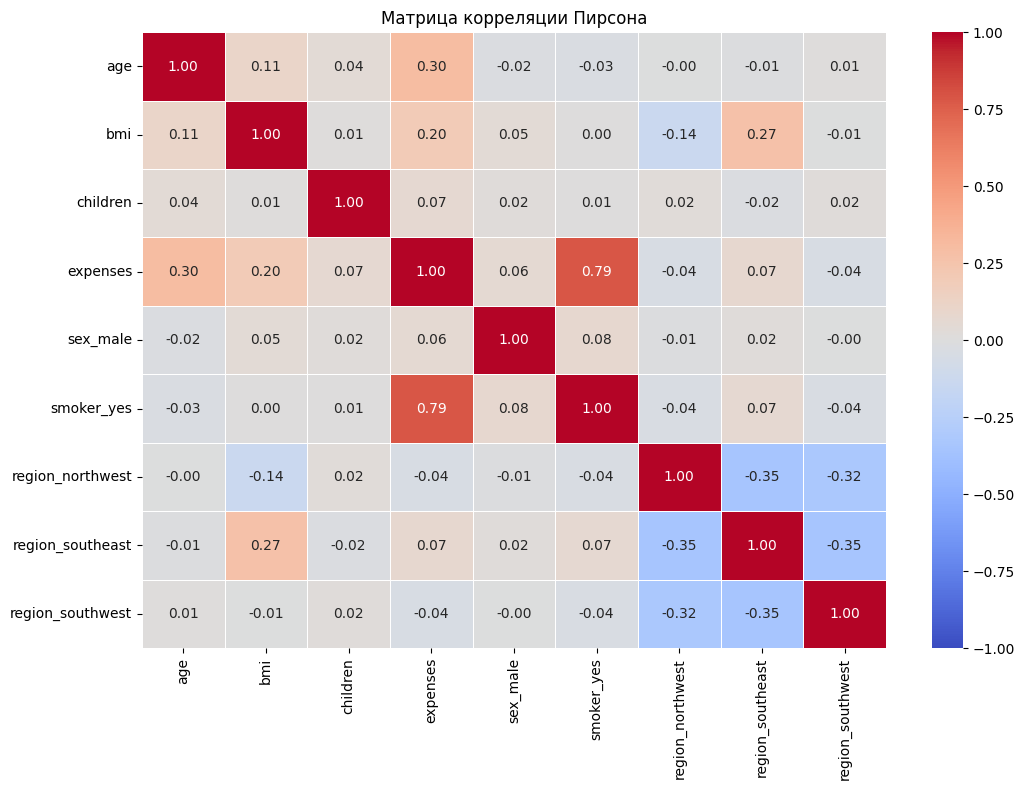

In [ ]:
# Рассчитаем корреляцию Пирсона для анализа связей между переменными
cor_matrix = df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            linewidths=0.5)
plt.title("Матрица корреляции Пирсона")
plt.show()

In [7]:
# Выделим независимые и зависимые переменные
X = df.drop('expenses', axis=1)
y = df['expenses']

In [44]:
# Разделение на обучащий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric = ['age', 'bmi', 'children']
categorical = ['sex_male', 'smoker_yes',
                   'region_northwest', 'region_southeast', 'region_southwest']

In [10]:
# Подключение библиотек
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Приводим к единому масштабу числовые данные

scaler = StandardScaler()
X_train_norm = X_train.copy()
X_train_norm[numeric] = scaler.fit_transform(X_train[numeric])

X_test_norm = X_test.copy()
X_test_norm[numeric] = scaler.transform(X_test[numeric])

# Построение моделей

In [13]:
# Подключение регрессоров
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Построение моделей LR\FT
model_lr = LinearRegression()
model_lr.fit(X_train_norm, y_train)

model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train_norm, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Оценка качества тестовой модели: коэффициент детерминации
print(f' model_lr score R^2 --{model_lr.score(X_test_norm, y_test):.4f}')
print(f' model_rfr score R^2 --{model_rfr.score(X_test_norm, y_test):.4f}')

 model_lr score R^2 --0.7836
 model_rfr score R^2 --0.8654


In [16]:
# Анализ полученных параметров обучения для регрессора
# Коэффициентыпри независимых переменных
print(f'Коэффициенты при независимых переменных model_lr:\n {model_lr.coef_}')

# Интерсепт
print('---'* 10)
print(f'Коэффициент свободного член model_lr: {model_lr.intercept_}')



Коэффициенты при независимых переменных model_lr:
 [ 3.61469763e+03  2.03726855e+03  5.17330947e+02 -1.85197407e+01
  2.36503123e+04 -3.70313511e+02 -6.58712382e+02 -8.09229878e+02]
------------------------------
Коэффициент свободного член model_lr: 8955.372731141857


# Оценка качества моделей

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

predictions_rl = model_lr.predict(X_test_norm)
MAE_rl = mean_absolute_error(y_test, predictions_rl)
print('MSE: ', mean_squared_error(y_test, predictions_rl))
print('R2, чем ближе к 1, тем лучше: ', r2_score(y_test, predictions_rl))
print('MAPE, чем ближе к 0%, тем лучше.: ', mean_absolute_percentage_error(y_test, predictions_rl))
if MAE_rl < 3500:
    print(f'Отличный результат: MAE < 3500 и = {mean_absolute_error(y_test, predictions_rl):.4f}')
else:
    print(f'  Пока результат не очень, значение   MAE = {mean_absolute_error(y_test, predictions_rl):.4f} > 3500')



MSE:  33600065.35507784
R2, чем ближе к 1, тем лучше:  0.7835726930039905
MAPE, чем ближе к 0%, тем лучше.:  0.46897986898338717
  Пока результат не очень, значение   MAE = 4181.5615 > 3500


In [18]:
predictions_rfr = model_rfr.predict(X_test_norm)
MAE = mean_absolute_error(y_test, predictions_rfr)

R_rfr = r2_score(y_test, predictions_rfr)
print('MSE: ', mean_squared_error(y_test, predictions_rfr))
print('MAPE (чем ближе к нулю, тем лучше): ', mean_absolute_percentage_error(y_test, predictions_rfr))

if MAE < 3500:
    print(f'Отличный результат: MAE < 3500 и = {MAE}')
else:
    print(f'  Значение  > 3500 и MAE = {MAE:.4f}')

if R_rfr >= 0.7:
    print(f'отличный результат R^2: модель объясняет {R_rfr:.4f}% изменчивости данных')
else:
    print(f'Низкий показатель R^2: модель объясняет только {R_rfr:.4f}% изменчивости данных')


MSE:  20902239.06838268
MAPE (чем ближе к нулю, тем лучше):  0.32256748673945973
Отличный результат: MAE < 3500 и = 2556.0849396108747
отличный результат R^2: модель объясняет 0.8654% изменчивости данных


In [20]:
# Получение коэфициентов для каждого предиктора модели

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

# 1. Выделяем числовые и категориальные признаки
numeric = ['age', 'bmi', 'children']
categorical = ['sex_male', 'smoker_yes',
              'region_northwest', 'region_southeast', 'region_southwest']

# 2. Копируем DataFrame чтобы не изменять исходные данные
df_scaled = df.copy()

# 3. Нормализуем только числовые признаки
scaler = StandardScaler()
df_scaled[numeric] = scaler.fit_transform(df[numeric])

# 4. Строим модель
model_lm = smf.ols('expenses ~ ' + ' + '.join(numeric + categorical),
                  data=df_scaled).fit()

# 5.  Полный стат. отчет модели
print(model_lm.summary())

# model_lm.params

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:16:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9053.6611    386.137  

Выводы:

Коэффициенты для числовых предикторов показывают изменения целевой переменной при изменнии признака на 1 стандартное отклонение.

Увеличение мед. расходов при изменении:
*   возраста, артериальнгое давления, коичество детей


Коэффициенты для категориальных  признаков интерпретируютя как разница относительно базовой категории, предикторы:
* курение, регионы проживания

Визуализируем качество предсказательной модели

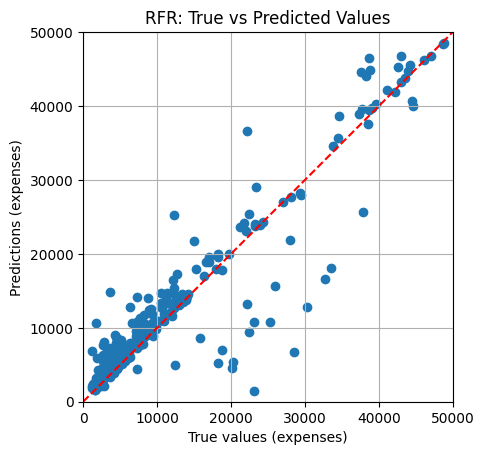

In [50]:
test_predictions = model_rfr.predict(X_test_norm).flatten()


a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims, 'r--')
plt.title('RFR: True vs Predicted Values')
plt.grid(True)
plt.show()